# RNN

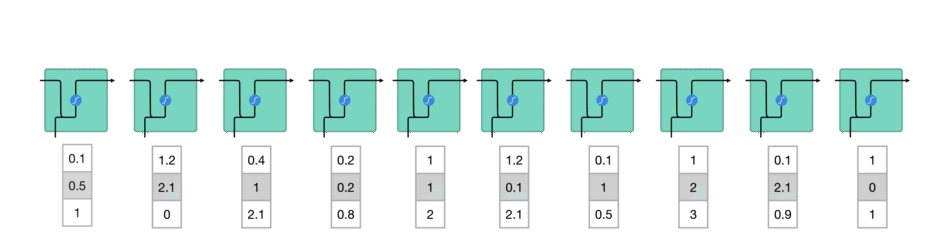

<span class="girk">While processing, it passes the previous hidden state to the next step of the sequence. The hidden state acts as the neural networks memory. It holds information on previous data the network has seen before.</span>


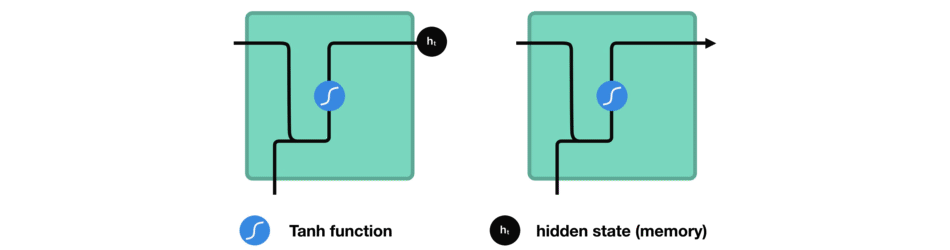

# Activity of each node

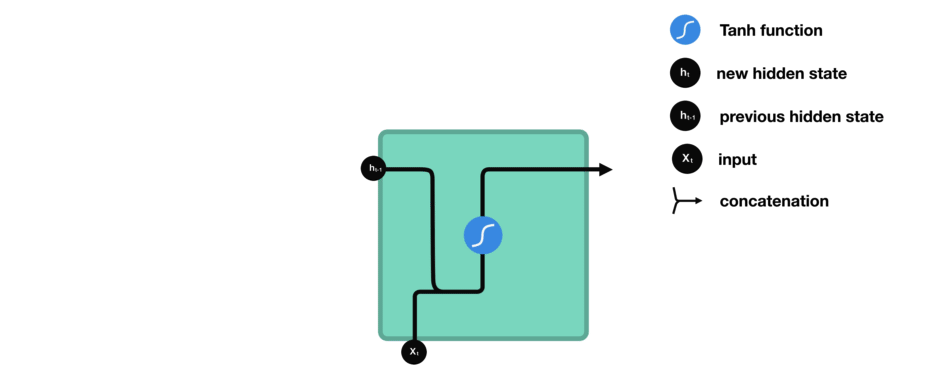

# Tanh activation

The tanh activation is used to help regulate the values flowing through the network. The tanh function squishes values to always be between -1 and 1.


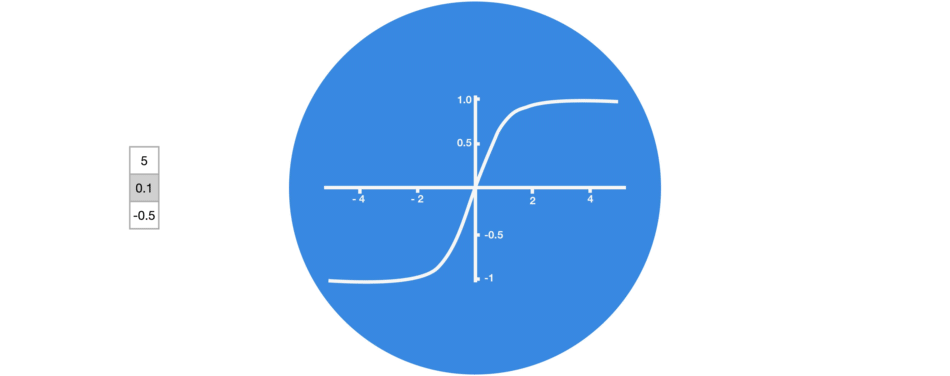

<span class="girk">When vectors are flowing through a neural network, it undergoes many transformations due to various math operations. So imagine a value that continues to be multiplied by let’s say 3.</span> 

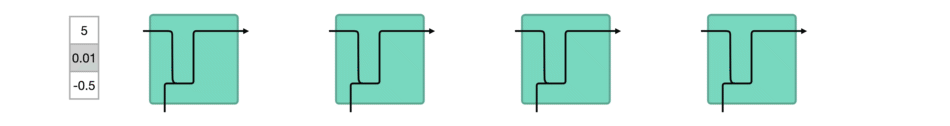

<span class="girk">A tanh function ensures that the values stay between -1 and 1, thus regulating the output of the neural network. You can see how the same values from above remain between the boundaries allowed by the tanh function.</span>

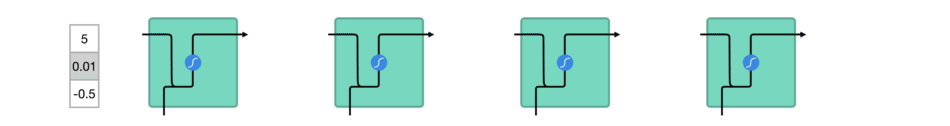

In [2]:
2**100

1267650600228229401496703205376

In [3]:
0.5**100

7.888609052210118e-31

In [48]:
#1
pow(0.9,200)

7.055079108655367e-10

In [1]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.recurrent import SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
import numpy as np
import pandas as pd
from collections import Counter

Using TensorFlow backend.


In [2]:
data=pd.read_csv("NLP-movie-review.csv")

In [3]:
data.head()

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


In [4]:
Counter([1,2,3,1,2,3,4,7])

Counter({1: 2, 2: 2, 3: 2, 4: 1, 7: 1})

In [5]:
docs = data[["review"]].values
labels = [1,0]
counts = Counter()
for i,review in enumerate(docs):
    counts.update(review[0].split())

In [6]:
counts

Counter({'Service': 15,
         'is': 171,
         'friendly': 18,
         'and': 378,
         'inviting.': 1,
         'Awesome': 2,
         'service': 41,
         'food.': 18,
         'Waitress': 3,
         'was': 292,
         'a': 228,
         'little': 10,
         'slow': 7,
         'in': 98,
         'service.': 16,
         'Come': 1,
         'hungry,': 1,
         'leave': 3,
         'happy': 8,
         'stuffed!': 1,
         'Horrible': 1,
         '-': 21,
         "don't": 22,
         'waste': 4,
         'your': 23,
         'time': 35,
         'money.': 2,
         'Just': 4,
         'as': 30,
         'good': 56,
         'when': 14,
         'I': 294,
         'had': 65,
         'it': 82,
         'more': 16,
         'than': 15,
         'year': 2,
         'ago!': 1,
         'Terrible': 2,
         'management.': 2,
         'The': 177,
         'outshining': 1,
         '&': 12,
         'definitely': 15,
         'recommend': 11,
         'the': 4

In [8]:
words = sorted(counts, key=counts.get, reverse=True)
vocab_size=len(words)

In [15]:
vocab_size

2967

In [16]:
word_to_int = {word: i for i, word in enumerate(words, 1)}


In [17]:
word_to_int["is"]

8

In [18]:
int_to_word = {i: word for i, word in enumerate(words, 1)}



In [19]:
int_to_word[8]

'is'

In [20]:
word_to_int["of"]

9

In [21]:
encoded_docs = []
for doc in docs:
    encoded_docs.append([word_to_int[word] for word in doc[0].split()])

In [22]:
word_to_int["Service"]

100

In [23]:
encoded_docs[:10]

[[100, 8, 77, 2, 988],
 [596, 35, 2, 78],
 [434, 4, 5, 144, 203, 12, 91],
 [989, 990, 435, 168, 2, 991],
 [992, 58, 56, 335, 52, 40, 2, 597],
 [336, 45, 26, 45, 112, 3, 18, 14, 92, 101, 5, 598, 993],
 [599, 600],
 [7, 35, 4, 994, 126, 3, 102, 135, 1, 995],
 [3, 23, 53, 39, 436, 145, 12, 1, 996, 2, 1, 169, 103, 127, 53, 241],
 [337, 1, 146, 338, 4, 26, 1, 997, 204, 4, 22, 601]]

In [24]:
docs[:10]

array([['Service is friendly and inviting.'],
       ['Awesome service and food.'],
       ['Waitress was a little slow in service.'],
       ['Come hungry, leave happy and stuffed!'],
       ["Horrible - don't waste your time and money."],
       ['Just as good as when I had it more than a year ago!'],
       ['Terrible management.'],
       ['The service was outshining & I definitely recommend the Halibut.'],
       ['I have been here several times in the past, and the experience has always been great.'],
       ['Now the pizza itself was good the peanut sauce was very tasty.']],
      dtype=object)

In [25]:
int_to_word[100]

'Service'

In [26]:
int_to_word[8]

'is'

In [27]:
int_to_word[77]

'friendly'

In [28]:
int_to_word[2]

'and'

In [29]:
int_to_word[988]

'inviting.'

In [30]:
encoded_docs 

[[100, 8, 77, 2, 988],
 [596, 35, 2, 78],
 [434, 4, 5, 144, 203, 12, 91],
 [989, 990, 435, 168, 2, 991],
 [992, 58, 56, 335, 52, 40, 2, 597],
 [336, 45, 26, 45, 112, 3, 18, 14, 92, 101, 5, 598, 993],
 [599, 600],
 [7, 35, 4, 994, 126, 3, 102, 135, 1, 995],
 [3, 23, 53, 39, 436, 145, 12, 1, 996, 2, 1, 169, 103, 127, 53, 241],
 [337, 1, 146, 338, 4, 26, 1, 997, 204, 4, 22, 601],
 [998, 20, 44, 37, 999],
 [32, 16, 8, 10, 118, 437, 14, 8, 10, 5, 118, 242],
 [63,
  10,
  205,
  119,
  339,
  33,
  1000,
  59,
  27,
  14,
  4,
  339,
  206,
  11,
  128,
  6,
  1001,
  6,
  136,
  1002,
  64,
  9,
  65],
 [602, 438, 603, 604, 1003, 605, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
 [1011, 11, 104, 28, 20, 1012],
 [49, 4, 170, 606],
 [439,
  29,
  1013,
  277,
  278,
  1014,
  45,
  1,
  171,
  1015,
  9,
  440,
  1016,
  3,
  23,
  60,
  441],
 [129, 4, 207, 35, 4, 207, 607, 21, 57],
 [3, 93, 608, 1017, 7, 1018, 8, 46, 1019],
 [7, 172, 8, 26, 1020, 340, 46, 1021],
 [208, 69, 1022, 3, 4, 1023],


In [31]:
max_length = 10
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 100    8   77 ...    0    0    0]
 [ 596   35    2 ...    0    0    0]
 [ 434    4    5 ...    0    0    0]
 ...
 [ 557  113    3 ...    5  501  871]
 [  69  196 2965 ...  785   80 2967]
 [   3   44  321 ...    0    0    0]]


In [32]:
data.shape

(1000, 2)

In [33]:
??SimpleRNN 

In [34]:
# define the model
embed_length=64
model = Sequential()
model.add(Embedding(vocab_size+1, embed_length, input_length=max_length))
model.add(SimpleRNN(1,activation='sigmoid', return_sequences=False,recurrent_initializer='Zeros',input_shape=(max_length,embed_length),unroll=True))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 64)            189952    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 190,020
Trainable params: 190,020
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.fit(padded_docs[:900,:].reshape(900,10),np.array(data.reaction[:900]).reshape(-1,1),epochs=500)

/Users/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
900/900 [==============================] - 1s 608us/step - loss: 0.7010 - acc: 0.5011
Epoch 2/500
900/900 [==============================] - 0s 147us/step - loss: 0.6968 - acc: 0.5011
Epoch 3/500
900/900 [==============================] - 0s 124us/step - loss: 0.6933 - acc: 0.5011
Epoch 4/500
900/900 [==============================] - 0s 194us/step - loss: 0.6895 - acc: 0.5011
Epoch 5/500
900/900 [==============================] - 0s 158us/step - loss: 0.6854 - acc: 0.5011
Epoch 6/500
900/900 [==============================] - 0s 126us/step - loss: 0.6809 - acc: 0.5011
Epoch 7/500
900/900 [==============================] - 0s 110us/step - loss: 0.6751 - acc: 0.5011
Epoch 8/500
900/900 [==============================] - 0s 113us/step - loss: 0.6688 - acc: 0.5167
Epoch 9/500
900/900 [==============================] - 0s 165us/step - loss: 0.6621 - acc: 0.5589
Epoch 10/500
900/900 [==============================] - 0s 104us/step - loss: 0.6555 - acc: 0.6000
Epoch 11/500
900/90

900/900 [==============================] - 0s 148us/step - loss: 0.2640 - acc: 0.9422
Epoch 166/500
900/900 [==============================] - 0s 115us/step - loss: 0.2623 - acc: 0.9411
Epoch 167/500
900/900 [==============================] - 0s 131us/step - loss: 0.2610 - acc: 0.9411
Epoch 168/500
900/900 [==============================] - 0s 150us/step - loss: 0.2598 - acc: 0.9400
Epoch 169/500
900/900 [==============================] - 0s 116us/step - loss: 0.2585 - acc: 0.9400
Epoch 170/500
900/900 [==============================] - 0s 166us/step - loss: 0.2566 - acc: 0.9411
Epoch 171/500
900/900 [==============================] - 0s 195us/step - loss: 0.2545 - acc: 0.9422
Epoch 172/500
900/900 [==============================] - 0s 165us/step - loss: 0.2528 - acc: 0.9433
Epoch 173/500
900/900 [==============================] - 0s 162us/step - loss: 0.2520 - acc: 0.9433
Epoch 174/500
900/900 [==============================] - 0s 176us/step - loss: 0.2505 - acc: 0.9433
Epoch 175/500


900/900 [==============================] - 0s 169us/step - loss: 0.1451 - acc: 0.9711
Epoch 248/500
900/900 [==============================] - 0s 148us/step - loss: 0.1440 - acc: 0.9722
Epoch 249/500
900/900 [==============================] - 0s 182us/step - loss: 0.1434 - acc: 0.9722
Epoch 250/500
900/900 [==============================] - 0s 138us/step - loss: 0.1429 - acc: 0.9722
Epoch 251/500
900/900 [==============================] - 0s 106us/step - loss: 0.1429 - acc: 0.9722
Epoch 252/500
900/900 [==============================] - 0s 114us/step - loss: 0.1421 - acc: 0.9722
Epoch 253/500
900/900 [==============================] - 0s 119us/step - loss: 0.1414 - acc: 0.9722
Epoch 254/500
900/900 [==============================] - 0s 127us/step - loss: 0.1409 - acc: 0.9722
Epoch 255/500
900/900 [==============================] - 0s 118us/step - loss: 0.1405 - acc: 0.9722
Epoch 256/500
900/900 [==============================] - 0s 108us/step - loss: 0.1398 - acc: 0.9722
Epoch 257/500


900/900 [==============================] - 0s 162us/step - loss: 0.0904 - acc: 0.9789
Epoch 410/500
900/900 [==============================] - 0s 143us/step - loss: 0.0953 - acc: 0.9789
Epoch 411/500
900/900 [==============================] - 0s 171us/step - loss: 0.0941 - acc: 0.9789
Epoch 412/500
900/900 [==============================] - 0s 163us/step - loss: 0.0946 - acc: 0.9789
Epoch 413/500
900/900 [==============================] - 0s 201us/step - loss: 0.0925 - acc: 0.9800
Epoch 414/500
900/900 [==============================] - 0s 163us/step - loss: 0.0922 - acc: 0.9800
Epoch 415/500
900/900 [==============================] - 0s 155us/step - loss: 0.0922 - acc: 0.9789
Epoch 416/500
900/900 [==============================] - 0s 166us/step - loss: 0.0920 - acc: 0.9800
Epoch 417/500
900/900 [==============================] - 0s 155us/step - loss: 0.0920 - acc: 0.9800
Epoch 418/500
900/900 [==============================] - 0s 166us/step - loss: 0.0919 - acc: 0.9800
Epoch 419/500


900/900 [==============================] - 0s 147us/step - loss: 0.0866 - acc: 0.9811
Epoch 492/500
900/900 [==============================] - 0s 115us/step - loss: 0.0865 - acc: 0.9811
Epoch 493/500
900/900 [==============================] - 0s 172us/step - loss: 0.0862 - acc: 0.9811
Epoch 494/500
900/900 [==============================] - 0s 203us/step - loss: 0.0863 - acc: 0.9811
Epoch 495/500
900/900 [==============================] - 0s 148us/step - loss: 0.0858 - acc: 0.9811
Epoch 496/500
900/900 [==============================] - 0s 129us/step - loss: 0.0859 - acc: 0.9800
Epoch 497/500
900/900 [==============================] - 0s 121us/step - loss: 0.0861 - acc: 0.9811
Epoch 498/500
900/900 [==============================] - 0s 158us/step - loss: 0.0862 - acc: 0.9811
Epoch 499/500
900/900 [==============================] - 0s 172us/step - loss: 0.0860 - acc: 0.9811
Epoch 500/500
900/900 [==============================] - 0s 123us/step - loss: 0.0861 - acc: 0.9811


In [42]:
from sklearn.metrics import accuracy_score

In [41]:
np.sum(np.where(model.predict_on_batch(padded_docs[900:,:].reshape(100,10))>0.5,1,0).reshape(100)-np.array(data.reaction[900:]))/100

0.12

In [18]:
np.array(data.reaction[:900])

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [19]:
padded_docs[0]

array([  0,   0,   0,   0,   0, 100,   8,  77,   2, 988], dtype=int32)

# LSTM AND GRU

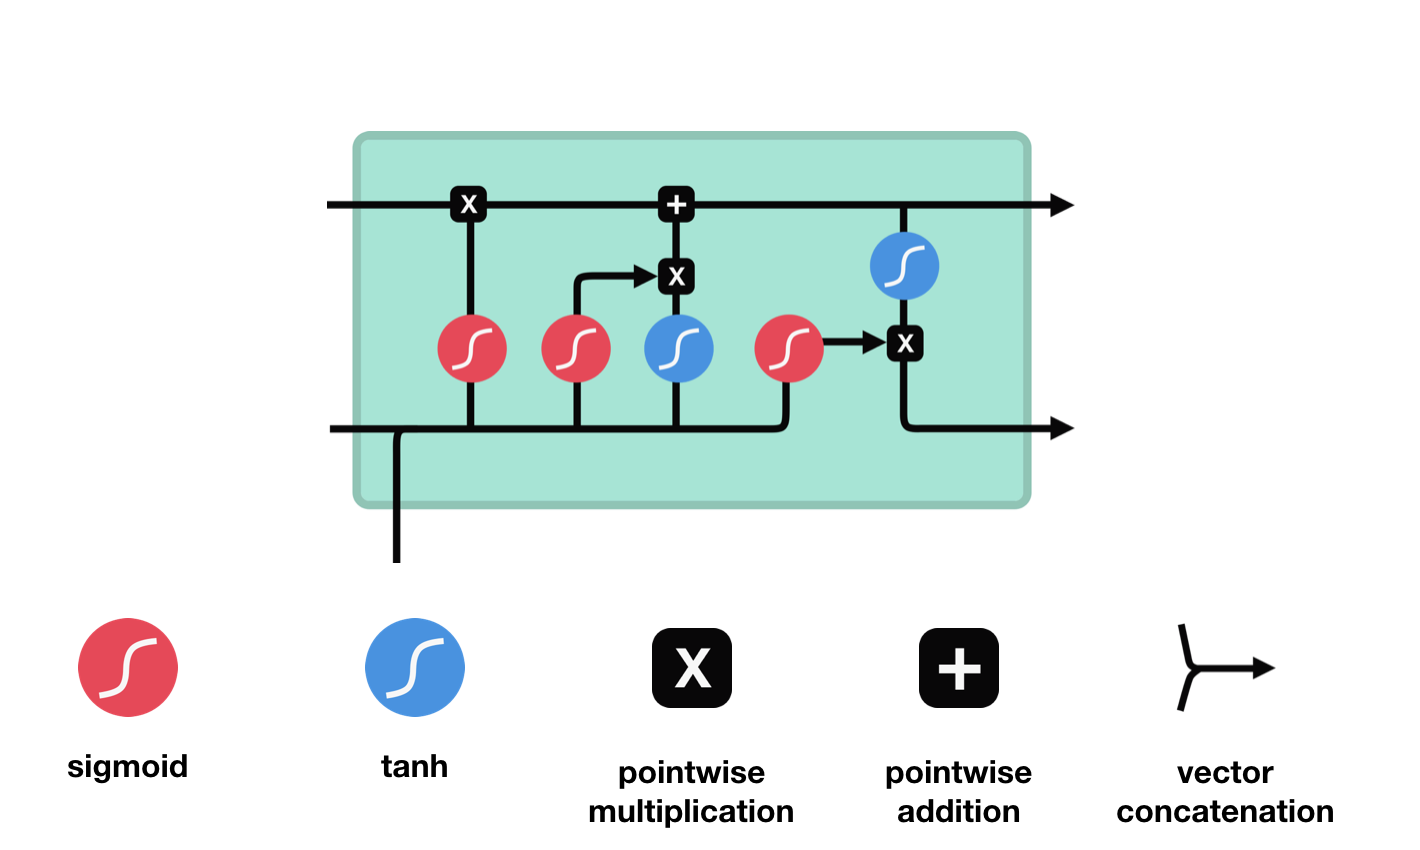

The core concept of LSTM’s are the cell state, and it’s various gates. The cell state act as a transport highway that transfers relative information all the way down the sequence chain. You can think of it as the “memory” of the network. The cell state, in theory, can carry relevant information throughout the processing of the sequence. So even information from the earlier time steps can make it’s way to later time steps, reducing the effects of short-term memory. As the cell state goes on its journey, information get’s added or removed to the cell state via gates. The gates are different neural networks that decide which information is allowed on the cell state. The gates can learn what information is relevant to keep or forget during training.

# Forget gate

First, we have the forget gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

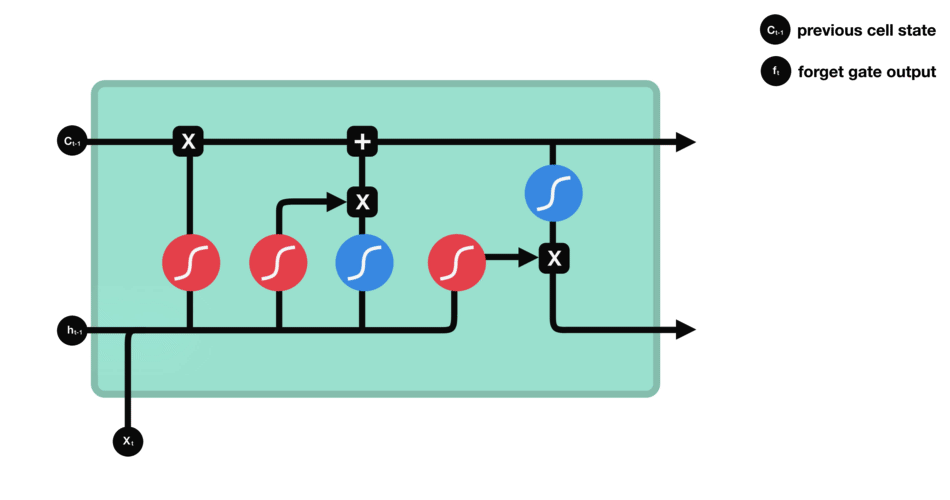

# Input Gate

To update the cell state, we have the input gate. First, we pass the previous hidden state and current input into a sigmoid function. That decides which values will be updated by transforming the values to be between 0 and 1. 0 means not important, and 1 means important. You also pass the hidden state and current input into the tanh function to squish values between -1 and 1 to help regulate the network. Then you multiply the tanh output with the sigmoid output. The sigmoid output will decide which information is important to keep from the tanh output.

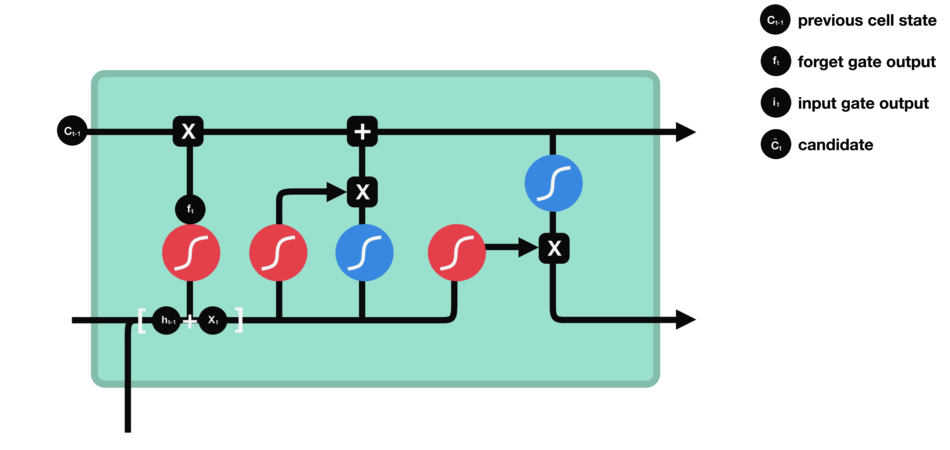

Now we should have enough information to calculate the cell state. First, the cell state gets pointwise multiplied by the forget vector. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then we take the output from the input gate and do a pointwise addition which updates the cell state to new values that the neural network finds relevant. That gives us our new cell state.


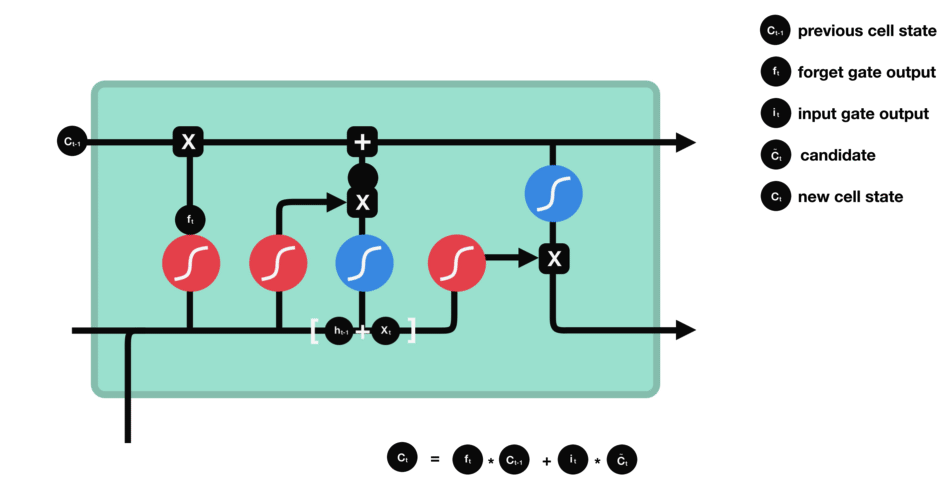

# Output Gate

The output gate determines the value of the next hidden state. This state contains information on previous inputs.

First, the values of the current state and previous hidden state are passed into the third sigmoid function. Then the new cell state generated from the cell state is passed through the tanh function. Both these outputs are multiplied point-by-point. Based upon the final value, the network decides which information the hidden state should carry. This hidden state is used for prediction.

Finally, the new cell state and new hidden state are carried over to the next time step.



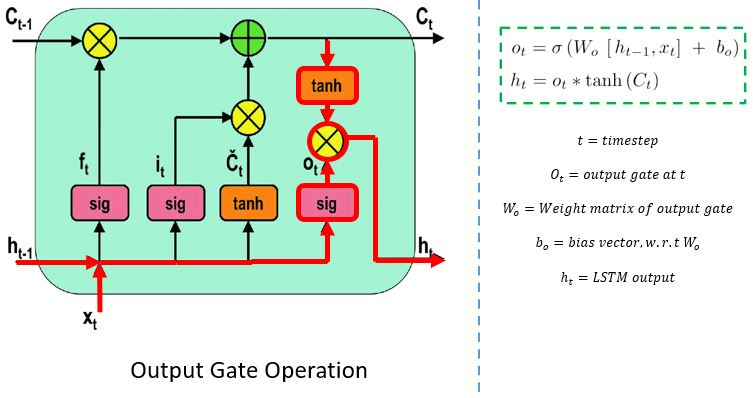

To conclude, the forget gate determines which relevant information from the prior steps is needed. The input gate decides what relevant information can be added from the current step, and the output gates finalize the next hidden state.

